In [1]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings("ignore")

In [2]:
training_data = pd.read_csv('../../data/final_project/training.csv')
test_data = pd.read_csv('../../data/final_project/public_test_features.csv')

print('The shape of the training dataset is:', training_data.shape)
print('The shape of the test dataset is:', test_data.shape)

The shape of the training dataset is: (36803, 228)
The shape of the test dataset is: (15774, 227)


In [3]:
numerical_features = ["key_pkg_height","key_pkg_length","key_pkg_width","key_pkg_weight",
                              "key_item_package_quantity","key_fma_qualified_price_max",
                              "cand_pkg_height","cand_pkg_length","cand_pkg_width","cand_pkg_weight",
                              "cand_item_package_quantity","cand_fma_qualified_price_max"]

categorical_features = ["key_classification_code", "key_Product Group Code","key_color_map",
                        "cand_classification_code", "cand_Product Group Code","cand_color_map"]

text_features = ["key_item_name", "cand_item_name"]

model_features = numerical_features + text_features + categorical_features
labels = ["label"]

df_train = training_data[labels + model_features]
df_test = test_data[model_features]

print(df_train.shape, df_test.shape)

(36803, 21) (15774, 20)


In [4]:
df_train.head(10)

,label,key_pkg_height,key_pkg_length,key_pkg_width,key_pkg_weight,key_item_package_quantity,key_fma_qualified_price_max,cand_pkg_height,cand_pkg_length,cand_pkg_width,...,cand_item_package_quantity,cand_fma_qualified_price_max,key_item_name,cand_item_name,key_classification_code,key_Product Group Code,key_color_map,cand_classification_code,cand_Product Group Code,cand_color_map
0,0,10.000000,20.000000,15.000000,6.300000,1.0,111.96,1.574803,18.110236,5.118110,...,1.0,35.70,Nickelodeon Teenage Mutant Ninja Turtles You B...,Roommates Rmk2249Gm Teenage Mutant Ninja Turtl...,base_product,201,NaN,base_product,60,NaN
1,0,0.200000,4.800000,4.000000,0.022046,6.0,15.71,0.300000,6.750000,4.500000,...,1.0,19.41,BLOCKIT RFID Protector Sleeves - Made in the U...,RFID Blocking Sleeves (10 Credit Card & 2 Pass...,base_product,229,NaN,base_product,107,NaN
2,1,2.100000,7.200000,4.600000,1.050000,1.0,43.37,2.007874,5.236220,3.937008,...,1.0,44.41,"Dual Output Portable Charger, Oripow Spark A6 ...","Anker PowerCore 10000, One of the Smallest and...",base_product,107,"Black, Silver, Grey, Pink, Blue, Gold",base_product,107,Black
3,1,NaN,NaN,NaN,NaN,1.0,648.63,2.401575,20.590551,10.314961,...,1.0,95.19,Optimus Popularis keyboard,Razer DeathStalker Expert - Backlit Ergonomic ...,base_product,147,NaN,base_product,147,NaN
4,1,0.200000,9.200000,7.500000,0.250000,1.0,23.85,1.102362,7.874016,5.196850,...,1.0,14.73,"Zuke's Genuine Jerky Dog Treats, Beef and Carr...","Hill's Science Diet Beef Jerky Dog Treats, Jer...",base_product,199,NaN,base_product,199,NaN
5,1,6.500000,51.600000,31.500000,51.200000,1.0,1496.73,6.700000,52.400000,31.800000,...,1.0,NaN,Samsung UN55KS8000 55-Inch 4K Ultra HD Smart L...,"LG Electronics 55"" LED TV (55SL5B-B)",base_product,504,NaN,base_product,504,NaN
6,0,NaN,NaN,NaN,NaN,2.0,42.16,0.300000,8.600000,2.200000,...,1.0,25.87,Ideashop 42mm Watch Replacement Wristband Sand...,MacTop Watch Band for Apple Watch Series 2 and...,base_product,107,NaN,base_product,107,Dark brown
7,1,3.800000,10.000000,4.000000,1.798972,1.0,246.79,1.732283,12.519685,1.811024,...,1.0,20.40,GoPro HERO3+: Silver Edition,Luxebell Selfie Stick Telescopic Pole Pocket P...,base_product,421,NaN,base_product,421,NaN
8,1,2.677165,6.377953,6.377953,1.410958,NaN,21.10,1.692913,5.393701,4.015748,...,20.0,26.69,Apatite Rough Natural Stones 1 Lb (.5 Kg) Bulk...,20 (TWENTY) AAA Grade CHARGED 500 - 650cts BAB...,base_product,201,NaN,base_product,201,NaN
9,0,0.800000,7.400000,7.000000,0.550000,1.0,29.76,0.700000,8.500000,5.500000,...,1.0,18.70,"PlanAhead Plan Ahead Agenda Book, Undated, 6.9...","Mead Pinstripe Weekly Wirebound Planner, 5-1/...",base_product,229,NaN,base_product,229,NaN


## Cleaning Textual Features from train and test for use in neural networks

In [5]:
df_train[categorical_features + text_features] = df_train[categorical_features + text_features].astype('str')
df_test[categorical_features + text_features] = df_test[categorical_features + text_features].astype('str')

In [6]:
# Prepare cleaning functions
import re, string
import nltk
from nltk.stem import SnowballStemmer
from nltk.corpus import stopwords

stop_words = stopwords.words('english')

stemmer = SnowballStemmer('english')

def preProcessText(text):
    # lowercase and strip leading/trailing white space
    text = text.lower().strip()
    
    # remove HTML tags
    text = re.compile('<.*?>').sub('', text)
    
    # remove punctuation
    text = re.compile('[%s]' % re.escape(string.punctuation)).sub(' ', text)
    
    # remove extra white space
    text = re.sub('\s+', ' ', text)
    
    return text

def lexiconProcess(text, stop_words, stemmer):
    filtered_sentence = []
    words = text.split(" ")
    for w in words:
        if w not in stop_words:
            filtered_sentence.append(stemmer.stem(w))
    text = " ".join(filtered_sentence)
    
    return text

def cleanSentence(text, stop_words, stemmer):
    return lexiconProcess(preProcessText(text), stop_words, stemmer)

In [7]:
# Clean the text features
for c in text_features:
    print('Text cleaning: ', c)
    df_train[c] = [cleanSentence(item, stop_words, stemmer) for item in df_train[c].values]
    df_test[c] = [cleanSentence(item, stop_words, stemmer) for item in df_test[c].values]

Text cleaning:  key_item_name
Text cleaning:  cand_item_name


In [8]:
for c in text_features:
    print(c)
    print(df_train[c].unique()) #value_counts()

key_item_name
['nickelodeon teenag mutant ninja turtl charact twin bed bag bed set'
 'blockit rfid protector sleev made usa recommend lifelock 6 pack credit debit card protector slim card holder fit men women wallet includ bonus secur ebook'
 'dual output portabl charger oripow spark a6 19200mah extern batteri batteri pack iphon ipad samsung htc nexus phone tablet 5v digit devic grey '
 ... 'canon eo rebel t6i digit slr ef 18 55mm stm len wi fi enabl'
 'militari invas star circl decal 22 inch hood decal restor custom armi willi truck jeep cj wrangler flat matt black'
 'tactic polic heavi duti 3w recharg flashlight']
cand_item_name
['roommat rmk2249gm teenag mutant ninja turtl leo peel stick giant wall decal'
 'rfid block sleev 10 credit card 2 passport protector 01 digit secur ident theft protect travel case set smart holder fit wallet purs cell phone'
 'anker powercor 10000 one smallest lightest 10000mah extern batteri ultra compact high speed charg technolog power bank iphon samsung 

In [ ]:
# for c in ["key_color_map","cand_color_map"]:
#     print('Text Cleaning: ', c)
#     df_train[c] = [cleanSentence(item, stop_words, stemmer) for item in df_train[c].values]
#     df_test[c] = [cleanSentence(item, stop_words, stemmer) for item in df_test[c].values]

In [ ]:
# for c in ["key_color_map","cand_color_map"]:
#     print(c)
#     print(df_train[c].unique()) #value_counts()

## Splitting the train and test datasets

In [9]:
from sklearn.model_selection import train_test_split

train_data, val_data = train_test_split(df_train
                                               ,test_size=0.10, shuffle=True, random_state=23)

In [10]:
print(train_data.shape, val_data.shape)

print(sum(val_data["label"] == 0))
print(sum(val_data["label"] == 1))

(33122, 21) (3681, 21)
1811
1870


## Defining the pipeline for the imputer

In [14]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

### COLUMN_TRANSFORMER ###
##########################

# Preprocess the numerical features
numerical_processor = Pipeline([
    ('num_imputer', SimpleImputer(strategy='mean')),
    ('num_scaler', MinMaxScaler())
                                ])
                  
# Preprocess the categorical features
categorical_processor = Pipeline([
    ('cat_imputer', SimpleImputer(strategy='constant', fill_value='missing')), # Shown in case is needed, no effect here as we already imputed with 'nan' strings
    ('cat_encoder', OneHotEncoder(handle_unknown='ignore')) # handle_unknown tells it to ignore (rather than throw an error for) any value that was not present in the initial training set.
                                ])

# Preprocess 1st text feature
text_processor_0 = Pipeline([
    ('text_vectorizer_0', TfidfVectorizer(max_features=250))
                                ])

# Preprocess 2nd text feature (larger vocabulary)
text_processor_1 = Pipeline([
    ('text_vectorizer_1', TfidfVectorizer(max_features=250))
                                ])
# Combine all data preprocessors from above (add more, if you choose to define more!)
# For each processor/step specify: a name, the actual process, and finally the features to be processed
data_processor = ColumnTransformer([
    ('numerical_processing', numerical_processor, numerical_features),
    ('categorical_processing', categorical_processor, categorical_features),
    ('text_processing_0', text_processor_0, text_features[0]),
    ('text_processing_1', text_processor_1, text_features[1])
                                    ]
        ,remainder='passthrough')

# Visualize the data processing pipeline
#from sklearn import set_config
#sklearn.set_config(display='diagram')
#data_processor

In [15]:
### DATA PROCESSING ###
#######################
# Get train data to pass through the imputer
X_train = train_data[model_features]
y_train = train_data[labels]

# Get val data to pass through the imputer
X_val = val_data[model_features]
y_val = val_data[labels]

#Get test data to pass through the imputer
X_test = df_test

print('Datasets shapes before processing: ', X_train.shape, X_val.shape, X_test.shape)

X_train = data_processor.fit_transform(X_train)
X_val = data_processor.transform(X_val)
X_test = data_processor.transform(X_test)

X_train=X_train.astype('float32').todense()
X_val=X_val.astype('float32').todense()
X_test=X_test.astype('float32').todense()

print('Datasets shapes after processing: ', X_train.shape, X_val.shape, X_test.shape)

Datasets shapes before processing:  (33122, 20) (3681, 20) (15774, 20)
Datasets shapes after processing:  (33122, 1271) (3681, 1271) (15774, 1271)


In [ ]:
# #creating features from categorical and dimensional features for train dataset
# df_model["difference_pkg_weight"] = pd.Series(np.absolute(df_model["key_pkg_weight"] - df_model["cand_pkg_weight"]))

# # df_model["same_binding_code"] = pd.Series(np.where((df_model["key_Binding Code"] == 
# #                                                             df_model["cand_Binding Code"]), 1, 0))
# # df_model["same_product_type"] = pd.Series(np.where((df_model["key_product_type"] == 
# #                                                             df_model["cand_product_type"]), 1, 0))

# df_model["same_classification_code"] = pd.Series(np.where((df_model["key_classification_code"] ==
#                                                         df_model["cand_classification_code"]), 1, 0))
# df_model["same_group_description"] = pd.Series(np.where((df_model["key_Product Group Description"] ==
#                                                         df_model["cand_Product Group Description"]), 1, 0))
# df_model["same_color_map"] = pd.Series(np.where((df_model["key_color_map"] ==
#                                                         df_model["cand_color_map"]), 1, 0))

# #creating features from categorical and dimensional features for test dataset
# test_data["difference_pkg_weight"] = pd.Series(np.absolute(df_model["key_pkg_weight"] - df_model["cand_pkg_weight"]))

# # test_data["same_binding_code"] = pd.Series(np.where((test_data["key_Binding Code"] == 
# #                                                             test_data["cand_Binding Code"]), 1, 0))
# # test_data["same_product_type"] = pd.Series(np.where((test_data["key_product_type"] == 
# #                                                             test_data["cand_product_type"]), 1, 0))
# test_data["same_classification_code"] = pd.Series(np.where((test_data["key_classification_code"] ==
#                                                         test_data["cand_classification_code"]), 1, 0))
# test_data["same_group_description"] = pd.Series(np.where((test_data["key_Product Group Description"] ==
#                                                         test_data["cand_Product Group Description"]), 1, 0))
# test_data["same_color_map"] = pd.Series(np.where((test_data["key_color_map"] ==
#                                                         test_data["cand_color_map"]), 1, 0))

# print(df_model.shape, test_data.shape)
# print(train_features)

# #adding created features to the train_feature set and setting the list of features to be used for the model
# categorical_features = ["same_pkg_weight","same_classification_code","same_group_description","same_color_map"]
# dimension_related_features = [i for i in dimension_related_features if i not in ["key_pkg_weight","cand_pkg_weight"]]

# train_features = dimension_related_features + categorical_features + text_features

# df_model = df_model[labels + train_features]
# df_model.shape

## Model Training Begins

In [16]:
######################
# Import the necessary libraries and classes
import mxnet as mx
from mxnet import gluon
import mxnet.ndarray as nd
import numpy as np

# Using CPU resource; mx.gpu() will use GPU resources if available
ctx = mx.cpu()   


######################
# Use Gluon Data Loaders to load the data in batches, while also converting to ND arrays for Gluon
train_dataset = mx.gluon.data.dataset.ArrayDataset(nd.array(X_train), nd.array(y_train))
val_dataset = mx.gluon.data.dataset.ArrayDataset(nd.array(X_val), nd.array(y_val))

train_data_loader = mx.gluon.data.DataLoader(train_dataset, batch_size=16)
val_data_loader = mx.gluon.data.DataLoader(val_dataset, batch_size=16)


######################
# Create a simple MultiLayer Perceptron using the Sequential mode - add things in sequence
#  with two hidden layers of size 64 and 128 
#  some dropouts attached to the hidden layers
#  one output layer
from mxnet.gluon import nn

net = nn.Sequential()
net.add(nn.Dense(128 ,activation='relu'),    # Layer 1
        nn.Dropout(.4),                     # Apply random 40% dropout to layer 1
        nn.Dense(256, activation='relu'),   # Layer 2
        nn.Dropout(.3),                     # Apply random 30% dropout to layer 2
        nn.Dense(1, activation='sigmoid'))  # Output layer

# print(net)     # print the network
# print(net[0])  # access individual layers


######################
# Initialize the weights parameters of the network with the Xavier initialization
#  Weights are actually initialized when passing input data through network, when network input size is learned from the input data.
from mxnet import init
net.collect_params().initialize(mx.init.Xavier())

######################
# Hyper-paramaters of the system
batch_size = 18
epochs = 15
learning_rate = 0.01


######################
# Define the loss function and the trainer
from mxnet.gluon.loss import SigmoidBinaryCrossEntropyLoss

# Choose SigmoidBinaryCrossEntropyLoss for this binary classification problem
#  https://mxnet.apache.org/versions/1.7.0/api/python/docs/api/gluon/loss/index.html#mxnet.gluon.loss.SigmoidBinaryCrossEntropyLoss
binary_cross_entropy_loss = SigmoidBinaryCrossEntropyLoss(from_sigmoid=True)

# Choose Stochastic Gradient Descent - can also experiment with other optimizers
#  https://mxnet.apache.org/versions/1.7.0/api/python/docs/api/optimizer/index.html#
trainer = gluon.Trainer(net.collect_params(), 'sgd', {'learning_rate': learning_rate})


######################
# Network Training and Validation
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from mxnet import autograd # autograd package expedites gradient calculations

train_losses = []
val_losses = []

# Starting the outer epoch loop (epoch = full pass through our dataset)
for epoch in range(epochs):
    
    # Training loop: (with autograd and trainer steps)
    # This loop does the training of the neural network
    # Weights are updated here
    cumulative_train_loss = 0
    train_predictions = []
    for i, (data, label) in enumerate(train_data_loader):
        with autograd.record():
            # Forward Pass input data through the network to make predictions
            output = net(data) 
            train_predictions += np.squeeze(output.asnumpy()).tolist()
        
            # Calculate the loss and add it to the cumulative loss
            loss = binary_cross_entropy_loss(output, label)
            cumulative_train_loss = cumulative_train_loss + nd.sum(loss)
            
            # Invoke Backpropagation (backprop) by calling loss.backward()
            loss.backward()
            
        trainer.step(data.shape[0])

    # Calculating the Log-loss for training data
    train_loss = cumulative_train_loss/len(X_train)
    train_losses.append(train_loss.asnumpy()[0])


    # Validation loop:
    # This loop validates the trained network on validation dataset
    # No weight updates here    
    cumulative_val_loss = 0
    val_predictions = []
    for i, (data, label) in enumerate(val_data_loader):
        # Forward Pass validation data through the network to make predictions
        output = net(data) 
        try:
            val_predictions += np.squeeze(output.asnumpy()).tolist()
        except:
            val_predictions.append(np.squeeze(output.asnumpy()).tolist())
        
        # Calculate the loss and add it to the cumulative loss
        val_loss = binary_cross_entropy_loss(output, label)
        cumulative_val_loss = cumulative_val_loss + nd.sum(val_loss)
    
    # Calculating the Log-loss for validation data
    val_loss = cumulative_val_loss/len(X_val)
    val_losses.append(val_loss.asnumpy()[0])
    
    
    # Round predictions: 0.5 and up becomes 1, 0 otherwise
    train_predictions = [round(train_pred) for train_pred in train_predictions]
    val_predictions = [round(val_pred) for val_pred in val_predictions]

    # Calculate training and validation accuracies
    train_accuracy = accuracy_score(y_train, train_predictions)
    validation_accuracy = accuracy_score(y_val, val_predictions)
    validation_report = classification_report(y_val, val_predictions)
    
    print("Epoch {}, training loss: {:.2f}, validation loss: {:.2f}, \
    training accuracy: {:.2f}, validation accuracy: {:.2f}".format(epoch, \
                                                                   train_loss.asnumpy()[0], 
                                                                   val_loss.asnumpy()[0], 
                                                                   train_accuracy, 
                                                                   validation_accuracy))
    print("Classification report \n", validation_report)

Epoch 0, training loss: 0.69, validation loss: 0.69,     training accuracy: 0.52, validation accuracy: 0.54
Classification report 
               precision    recall  f1-score   support

           0       0.53      0.70      0.60      1811
           1       0.57      0.39      0.46      1870

    accuracy                           0.54      3681
   macro avg       0.55      0.54      0.53      3681
weighted avg       0.55      0.54      0.53      3681

Epoch 1, training loss: 0.69, validation loss: 0.69,     training accuracy: 0.54, validation accuracy: 0.55
Classification report 
               precision    recall  f1-score   support

           0       0.53      0.66      0.59      1811
           1       0.57      0.44      0.49      1870

    accuracy                           0.55      3681
   macro avg       0.55      0.55      0.54      3681
weighted avg       0.55      0.55      0.54      3681

Epoch 2, training loss: 0.69, validation loss: 0.68,     training accuracy: 0.55, 

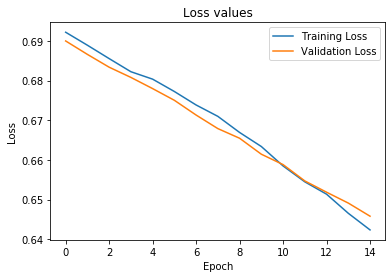

In [17]:
%matplotlib inline
import matplotlib.pyplot as plt

plt.plot(train_losses, label="Training Loss")
plt.plot(val_losses, label="Validation Loss")
plt.title("Loss values")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.show()

In [18]:
# Make predictions with the network on the test data
test_input = nd.array(X_test.astype('float32')).as_in_context(ctx)
test_predictions_0 = net(test_input)

# Round predictions: 0.5 and up becomes 1, 0 otherwise
test_predictions = [round(pred) for pred in np.squeeze(test_predictions_0.asnumpy()).tolist()]

len(test_predictions)

15774

In [19]:
test_data["label"] = test_predictions
submission = test_data[["ID","label"]]
submission.head(5)

,ID,label
0,35057,1
1,41573,0
2,44029,0
3,6462,1
4,17533,0
5,22432,0
6,37471,0
7,26858,0
8,37282,1
9,21448,1


In [20]:
submission["label"].value_counts()

1    8015
0    7759
Name: label, dtype: int64

In [21]:
submission.to_csv("../../data/final_project/NN_V_4.0.csv", index=False)